# Max Hops , Misinformation Propogation , Dissemination , Diffusion 

Tweets that eventually get verified are labeled as True, tweets proved to contain fake claims are labeled as False, while tweets that contain information that can be neither confirmed nor disproved are labeled as Unverified. Finally, tweets that contain legitimate, fact-based information are considered Non-rumors. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Markdown as md

# Define the path to your text file
file_path = './Data/twitter16/label.txt'

# Initialize empty lists to store the data
labels = []
values = []

# Read the file line by line and extract the data
with open(file_path, 'r') as file:
    for line in file:
        line = line.strip()  # Remove any leading/trailing whitespace
        label, value = line.split(':')  # Split the line into label and value
        labels.append(label)
        values.append(int(value))  # Convert the value to an integer

# Create a DataFrame from the lists
df = pd.DataFrame({'Label': labels, 'SourceTweetID': values})

# Optionally, you can filter the DataFrame based on specific labels:
df_filtered = df[df['Label'].isin(['true', 'false'])]

distinct_labels = df['Label'].unique()
print(distinct_labels)

# Display the DataFrame
df_filtered


['false' 'true' 'unverified' 'non-rumor']


,Label,SourceTweetID
0,false,656955120626880512
1,true,615689290706595840
2,false,613404935003217920
5,true,614467824313106432
9,false,622891631293935616
...,...,...
799,true,552806757672964097
801,true,544350567183556608
805,true,614593386188828672
811,true,650046859537448960


## Getting Maximum Length Of Rumors That Is True For Twitter 16

In [2]:
df_filtered_true = df_filtered[df_filtered['Label'].isin(['true'])]
len(df_filtered_true['SourceTweetID'].unique())
rumor_tweet_id= df_filtered_true['SourceTweetID'].unique()
len(df_filtered_true['SourceTweetID'])

207

In [3]:
int("517850508380618752")  in rumor_tweet_id

False

In [4]:
import os
import pandas as pd

# Define the path to your folder containing files
folder_path ='./Data/twitter16/tree' #'./Data/testtree'


# Initialize empty lists to store the extracted data
sender_uid = []
sender_tweet_id = []
sender_post_time_delay = []
receiver_uid = []
receiver_tweet_id = []
receiver_post_time_delay = []
counter=0
# Iterate through the files in the folder
for filename in os.listdir(folder_path):
#     counter=counter+1
#     if counter>10000:
#         break
    file_path = os.path.join(folder_path, filename)
    if int(filename.replace(".txt","")) in rumor_tweet_id: 
        #print(filename.replace(".txt","") ,' is present')
            # Open and read each file
        with open(file_path, 'r') as file:
            for line in file:
                # Split the line to extract the sender and receiver data
                sender_data, receiver_data = line.strip().split('->')

                sender_values = sender_data.strip('[]').replace("'", "").split(', ')
                receiver_values = receiver_data.strip('[]').replace("'", "").split(', ')

                sender_uid.append(sender_values[0])
                sender_tweet_id.append(sender_values[1])
                sender_post_time_delay.append(float(sender_values[2]))

                receiver_uid.append(receiver_values[0])
                receiver_tweet_id.append(receiver_values[1])
                receiver_post_time_delay.append(float(receiver_values[2]))
        
    #else: 
        #print(filename.replace(".txt","") ,' is NOT present')
    
    


# Create a DataFrame from the extracted data
df_filtered_true = pd.DataFrame({
    'sender_uid': sender_uid,
    'sender_tweet_id': sender_tweet_id,
    'sender_post_time_delay': sender_post_time_delay,
    'receiver_uid': receiver_uid,
    'receiver_tweet_id': receiver_tweet_id,
    'receiver_post_time_delay': receiver_post_time_delay
})
df_filtered_true = df_filtered_true[df_filtered_true['sender_uid'] != 'ROOT']
# Print the DataFrame
df_filtered_true

,sender_uid,sender_tweet_id,sender_post_time_delay,receiver_uid,receiver_tweet_id,receiver_post_time_delay
1,24165761,498430783699554305,0.00,33164207,498430783699554305,0.30
2,24165761,498430783699554305,0.00,203957378,498430783699554305,1.00
3,24165761,498430783699554305,0.00,475947737,498430783699554305,1.00
4,24165761,498430783699554305,0.00,367810627,498430783699554305,2.70
5,24165761,498430783699554305,0.00,144351126,498430783699554305,2.85
...,...,...,...,...,...,...
85411,542969756,681147789653356544,8.58,2625403678,681147789653356544,4491.28
85412,16331010,681147789653356544,0.00,2266049629,681147789653356544,5599.08
85413,16331010,681147789653356544,0.00,1282008877,681147789653356544,7168.53
85414,2200462214,681147789653356544,10.47,181107511,681147789653356544,136289.02


In [5]:
# df_filtered_true["sender_tweet_id"].unique()

In [6]:
import networkx as nx

# Create a directed graph
G = nx.DiGraph()

# Iterate through the DataFrame and add edges to the graph
for _, row in df_filtered_true.iterrows(): # df[:1000].iterrows():
    #     sender_uid = row['sender_tweet_id'] #row['sender_uid']
    #     receiver_uid =row['receiver_tweet_id'] #row['receiver_uid']
    sender_uid = row['sender_uid']+""+row['sender_tweet_id'] #row['sender_uid']
    receiver_uid =row['receiver_uid'] +""+row['receiver_tweet_id'] #row['receiver_uid']
    G.add_edge(sender_uid, receiver_uid)

# Get the number of vertices (nodes)
num_vertices = G.number_of_nodes()

# Get the number of edges
num_edges = G.number_of_edges()

print(f"Number of vertices (nodes): {num_vertices}")
print(f"Number of edges: {num_edges}")

Number of vertices (nodes): 84622
Number of edges: 85209


Longest directed path: ['2163076560632377165477191680', '362057867632377165477191680', '42964759632377165477191680', '69085340632377165477191680', '34713681632377165477191680', '160947724632377165477191680', '72361275632377165477191680', '248516651632377165477191680', '465137918632377165477191680', '327563312632377165477191680', '2223812580632377165477191680', '2396125746632377165477191680']
Longest directed path: 12


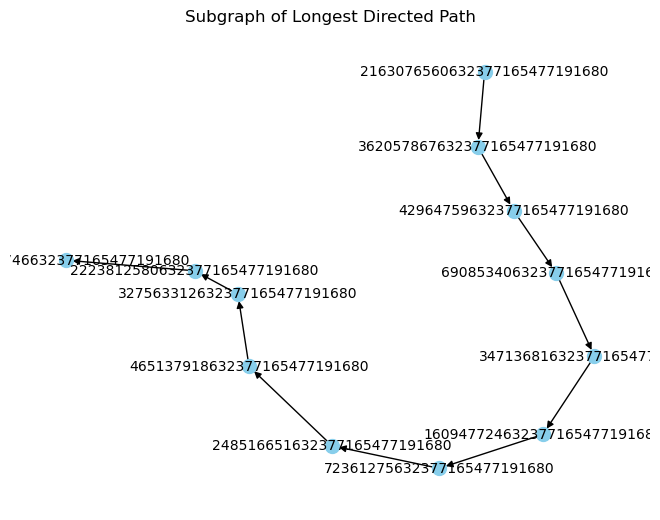

In [7]:
import pandas as pd
import networkx as nx


# Function to find the longest directed path using DFS
def longest_directed_path(graph, node):
    visited = set()
    stack = [node]
    longest_path = []

    while stack:
        current_node = stack.pop()
        visited.add(current_node)
        #path = nx.shortest_path(graph, source=node, target=current_node, method='dijkstra')
        path = nx.shortest_path(graph, source=node, target=current_node, method='dijkstra')
        if len(path) > len(longest_path):
            longest_path = path
        for neighbor in graph.successors(current_node):
            if neighbor not in visited:
                stack.append(neighbor)

    return longest_path

# Find the longest directed path in the graph
longest_path = []
for node in G.nodes:
    path = longest_directed_path(G, node)
    if len(path) > len(longest_path):
        longest_path = path

# Create a subgraph with only the vertices and edges in the longest path
subgraph = G.subgraph(longest_path)

# Display the longest path and its connected vertices
print("Longest directed path:", longest_path)
# connected_vertices = list(set(node for path in longest_path for node in path))
# print("Connected vertices:", connected_vertices)
print("Longest directed path:", len(longest_path))

LongPathForRumours_Twitter16=len(longest_path)
# Plot the subgraph with only the vertices and edges in the longest path
pos = nx.spring_layout(subgraph)  # Layout for visualization
nx.draw(subgraph, pos, with_labels=True, node_color='skyblue', node_size=100, font_size=10, font_color='black')
plt.title("Subgraph of Longest Directed Path")
plt.show()

In [8]:
md("### Maximum Propogation For Rumours Thats Is True is:  %i "%(len(longest_path)))

### Maximum Propogation For Rumours Thats Is True is:  12 

## Getting Maximum Length Of Rumors That Is Fake For Twitter 16

In [9]:
df_filtered_false = df_filtered[df_filtered['Label'].isin(['false'])]
len(df_filtered_false['SourceTweetID'].unique())
tumor_tweet_id= df_filtered_false['SourceTweetID'].unique()


In [10]:
int("517850508380618752")  in tumor_tweet_id

False

In [11]:
import os
import pandas as pd

# Define the path to your folder containing files
folder_path ='./Data/twitter16/tree' #'./Data/testtree'


# Initialize empty lists to store the extracted data
sender_uid = []
sender_tweet_id = []
sender_post_time_delay = []
receiver_uid = []
receiver_tweet_id = []
receiver_post_time_delay = []
counter=0
# Iterate through the files in the folder
for filename in os.listdir(folder_path):
#     counter=counter+1
#     if counter>10000:
#         break
    file_path = os.path.join(folder_path, filename)
    if int(filename.replace(".txt","")) in tumor_tweet_id: 
        #print(filename.replace(".txt","") ,' is present')
            # Open and read each file
        with open(file_path, 'r') as file:
            for line in file:
                # Split the line to extract the sender and receiver data
                sender_data, receiver_data = line.strip().split('->')

                sender_values = sender_data.strip('[]').replace("'", "").split(', ')
                receiver_values = receiver_data.strip('[]').replace("'", "").split(', ')

                sender_uid.append(sender_values[0])
                sender_tweet_id.append(sender_values[1])
                sender_post_time_delay.append(float(sender_values[2]))

                receiver_uid.append(receiver_values[0])
                receiver_tweet_id.append(receiver_values[1])
                receiver_post_time_delay.append(float(receiver_values[2]))
        
#     else: 
#         print(filename.replace(".txt","") ,' is NOT present')
    
    


# Create a DataFrame from the extracted data
df_filtered_false = pd.DataFrame({
    'sender_uid': sender_uid,
    'sender_tweet_id': sender_tweet_id,
    'sender_post_time_delay': sender_post_time_delay,
    'receiver_uid': receiver_uid,
    'receiver_tweet_id': receiver_tweet_id,
    'receiver_post_time_delay': receiver_post_time_delay
})
df_filtered_false = df_filtered_false[df_filtered_false['sender_uid'] != 'ROOT']
# Print the DataFrame
df_filtered_false

,sender_uid,sender_tweet_id,sender_post_time_delay,receiver_uid,receiver_tweet_id,receiver_post_time_delay
1,2470325805,594687353937100801,0.0,1045873944,594687353937100801,1.17
2,2470325805,594687353937100801,0.0,2818187993,594687353937100801,1.17
3,2470325805,594687353937100801,0.0,526726554,594687353937100801,1.17
4,2470325805,594687353937100801,0.0,2394981310,594687353937100801,1.17
5,2470325805,594687353937100801,0.0,755803914,594687353937100801,4.85
...,...,...,...,...,...,...
76583,972651,681767380305985536,0.0,34294546,681767380305985536,626.48
76584,972651,681767380305985536,0.0,19058535,681767380305985536,1644.97
76585,972651,681767380305985536,0.0,20732140,681767380305985536,2088.33
76586,972651,681767380305985536,0.0,2185248516,681767380305985536,2121.45


In [12]:
# df_filtered_true["sender_tweet_id"].unique()

In [13]:
import networkx as nx

# Create a directed graph
G = nx.DiGraph()

# Iterate through the DataFrame and add edges to the graph
for _, row in df_filtered_false.iterrows(): # df[:1000].iterrows():
    sender_uid =row['sender_uid']+""+row['sender_tweet_id'] #row['sender_uid']
    receiver_uid =row['receiver_uid']+""+row['receiver_tweet_id'] #row['receiver_uid']
    G.add_edge(sender_uid, receiver_uid)

# Get the number of vertices (nodes)
num_vertices = G.number_of_nodes()

# Get the number of edges
num_edges = G.number_of_edges()

print(f"Number of vertices (nodes): {num_vertices}")
print(f"Number of edges: {num_edges}")

Number of vertices (nodes): 75350
Number of edges: 76383


Longest directed path: ['1547119022629503919098429440', '702173150629503919098429440', '233725810629503919098429440', '575802197629503919098429440', '580916769629503919098429440', '1465596979629503919098429440', '2346125758629503919098429440', '1064239093629503919098429440', '1014375852629503919098429440', '733259323629503919098429440', '2782382746629503919098429440', '2312398241629503919098429440', '444933746629503919098429440', '1895084958629503919098429440', '772361293629503919098429440', '632538507629503919098429440', '2317856005629503919098429440']
Longest directed path: 17


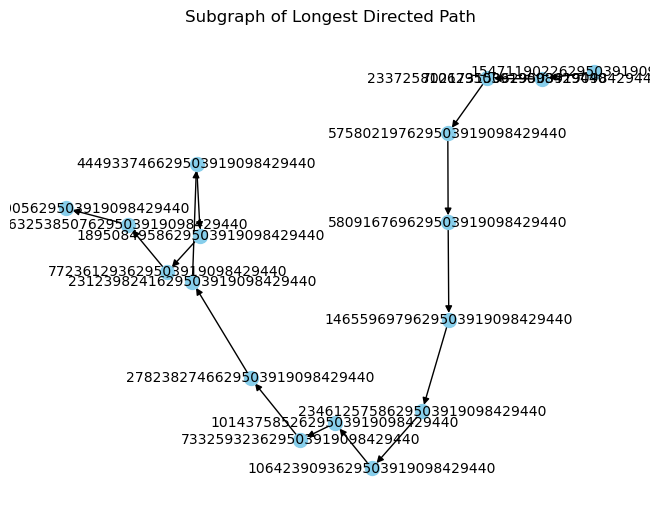

In [14]:
import pandas as pd
import networkx as nx


# Function to find the longest directed path using DFS
def longest_directed_path(graph, node):
    visited = set()
    stack = [node]
    longest_path = []

    while stack:
        current_node = stack.pop()
        visited.add(current_node)
        #path = nx.shortest_path(graph, source=node, target=current_node, method='dijkstra')
        path = nx.shortest_path(graph, source=node, target=current_node, method='dijkstra')
        if len(path) > len(longest_path):
            longest_path = path
        for neighbor in graph.successors(current_node):
            if neighbor not in visited:
                stack.append(neighbor)

    return longest_path

# Find the longest directed path in the graph
longest_path = []
for node in G.nodes:
    path = longest_directed_path(G, node)
    if len(path) > len(longest_path):
        longest_path = path

# Create a subgraph with only the vertices and edges in the longest path
subgraph = G.subgraph(longest_path)

# Display the longest path and its connected vertices
print("Longest directed path:", longest_path)
# connected_vertices = list(set(node for path in longest_path for node in path))
# print("Connected vertices:", connected_vertices)
print("Longest directed path:", len(longest_path))
LongPathForNonRumours_Twitter16=len(longest_path)

# Plot the subgraph with only the vertices and edges in the longest path
pos = nx.spring_layout(subgraph)  # Layout for visualization
nx.draw(subgraph, pos, with_labels=True, node_color='skyblue', node_size=100, font_size=10, font_color='black')
plt.title("Subgraph of Longest Directed Path")
plt.show()

In [15]:
md("### Maximum Propogation For Rumours That Is Fake is:  %i "%(len(longest_path)))

### Maximum Propogation For Rumours That Is Fake is:  17 

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Markdown as md

# Define the path to your text file
file_path = './Data/twitter15/label.txt'

# Initialize empty lists to store the data
labels = []
values = []

# Read the file line by line and extract the data
with open(file_path, 'r') as file:
    for line in file:
        line = line.strip()  # Remove any leading/trailing whitespace
        label, value = line.split(':')  # Split the line into label and value
        labels.append(label)
        values.append(int(value))  # Convert the value to an integer

# Create a DataFrame from the lists
df = pd.DataFrame({'Label': labels, 'SourceTweetID': values})

# Optionally, you can filter the DataFrame based on specific labels:
df_filtered = df[df['Label'].isin(['true', 'false'])]

distinct_labels = df['Label'].unique()
print(distinct_labels)

# Display the DataFrame
df_filtered


['unverified' 'non-rumor' 'true' 'false']


,Label,SourceTweetID
4,true,551099691702956032
7,true,514106273852174337
9,false,495366618818830336
10,false,532206910796468224
11,false,560187970389819392
...,...,...
1480,true,528242965915779072
1481,true,407205235682050048
1482,true,508002575858561024
1484,true,427780584979836929


## Getting Maximum Length Of Rumors That Is True Information For Twitter 15

In [17]:
df_filtered_true = df_filtered[df_filtered['Label'].isin(['true'])]
len(df_filtered_true['SourceTweetID'].unique())
tumor_tweet_id= df_filtered_true['SourceTweetID'].unique()
len(df_filtered_true['SourceTweetID'])

372

In [18]:
int("517850508380618752")  in tumor_tweet_id

True

In [19]:
import os
import pandas as pd

# Define the path to your folder containing files
folder_path ='./Data/twitter15/tree' #'./Data/testtree'


# Initialize empty lists to store the extracted data
sender_uid = []
sender_tweet_id = []
sender_post_time_delay = []
receiver_uid = []
receiver_tweet_id = []
receiver_post_time_delay = []
counter=0
# Iterate through the files in the folder
for filename in os.listdir(folder_path):
#     counter=counter+1
#     if counter>10000:
#         break
    file_path = os.path.join(folder_path, filename)
    if int(filename.replace(".txt","")) in tumor_tweet_id: 
        #print(filename.replace(".txt","") ,' is present')
            # Open and read each file
        with open(file_path, 'r') as file:
            for line in file:
                # Split the line to extract the sender and receiver data
                sender_data, receiver_data = line.strip().split('->')

                sender_values = sender_data.strip('[]').replace("'", "").split(', ')
                receiver_values = receiver_data.strip('[]').replace("'", "").split(', ')

                sender_uid.append(sender_values[0])
                sender_tweet_id.append(sender_values[1])
                sender_post_time_delay.append(float(sender_values[2]))

                receiver_uid.append(receiver_values[0])
                receiver_tweet_id.append(receiver_values[1])
                receiver_post_time_delay.append(float(receiver_values[2]))
        
    #else: 
        #print(filename.replace(".txt","") ,' is NOT present')
    
    


# Create a DataFrame from the extracted data
df_filtered_true = pd.DataFrame({
    'sender_uid': sender_uid,
    'sender_tweet_id': sender_tweet_id,
    'sender_post_time_delay': sender_post_time_delay,
    'receiver_uid': receiver_uid,
    'receiver_tweet_id': receiver_tweet_id,
    'receiver_post_time_delay': receiver_post_time_delay
})
df_filtered_true = df_filtered_true[df_filtered_true['sender_uid'] != 'ROOT']
# Print the DataFrame
df_filtered_true

,sender_uid,sender_tweet_id,sender_post_time_delay,receiver_uid,receiver_tweet_id,receiver_post_time_delay
1,20003448,295152287901417472,0.00,598415412,295152495146184704,0.83
2,20003448,295152287901417472,0.00,438384029,295152287901417472,0.88
3,20003448,295152287901417472,0.00,237267675,295152287901417472,0.88
4,20003448,295152287901417472,0.00,508006338,295152287901417472,0.88
5,20003448,295152287901417472,0.00,493390865,295152287901417472,0.88
...,...,...,...,...,...,...
123613,183498046,574062768896212992,78.33,491809971,574062768896212992,3233.03
123614,28785486,574062768896212992,0.00,993275714,574880443188789248,3249.15
123615,28785486,574062768896212992,0.00,238744876,574062768896212992,3361.83
123616,28785486,574062768896212992,0.00,3080853772,574916411442749440,3392.07


In [20]:
# df_filtered_true["sender_tweet_id"].unique()

In [21]:
import networkx as nx

# Create a directed graph
G = nx.DiGraph()

# Iterate through the DataFrame and add edges to the graph
for _, row in df_filtered_true.iterrows(): # df[:1000].iterrows():
    sender_uid =row['sender_uid']+""+row['sender_tweet_id'] #row['sender_uid']
    receiver_uid =row['receiver_uid']+""+row['receiver_tweet_id'] #row['receiver_uid']
    G.add_edge(sender_uid, receiver_uid)

# Get the number of vertices (nodes)
num_vertices = G.number_of_nodes()

# Get the number of edges
num_edges = G.number_of_edges()

print(f"Number of vertices (nodes): {num_vertices}")
print(f"Number of edges: {num_edges}")

Number of vertices (nodes): 122163
Number of edges: 123227


Longest directed path: ['97000212499690043594665985', '12004852499690189950697473', '15249499499683602452717569', '326282340499683602452717569', '837601970499683602452717569', '148800994499683602452717569', '174090641499683602452717569', '64326023499683602452717569', '18788414499683602452717569', '163346764499683602452717569', '531884466499683602452717569']
Longest directed path: 11


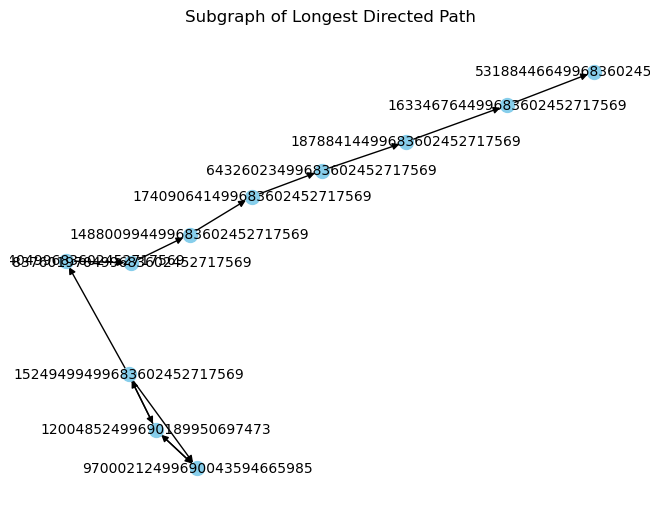

In [22]:
import pandas as pd
import networkx as nx


# Function to find the longest directed path using DFS
def longest_directed_path(graph, node):
    visited = set()
    stack = [node]
    longest_path = []

    while stack:
        current_node = stack.pop()
        visited.add(current_node)
        #path = nx.shortest_path(graph, source=node, target=current_node, method='dijkstra')
        path = nx.shortest_path(graph, source=node, target=current_node, method='dijkstra')
        if len(path) > len(longest_path):
            longest_path = path
        for neighbor in graph.successors(current_node):
            if neighbor not in visited:
                stack.append(neighbor)

    return longest_path

# Find the longest directed path in the graph
longest_path = []
for node in G.nodes:
    path = longest_directed_path(G, node)
    if len(path) > len(longest_path):
        longest_path = path

# Create a subgraph with only the vertices and edges in the longest path
subgraph = G.subgraph(longest_path)

# Display the longest path and its connected vertices
print("Longest directed path:", longest_path)
# connected_vertices = list(set(node for path in longest_path for node in path))
# print("Connected vertices:", connected_vertices)
print("Longest directed path:", len(longest_path))
LongPathForRumours_Twitter15=len(longest_path)
# Plot the subgraph with only the vertices and edges in the longest path
pos = nx.spring_layout(subgraph)  # Layout for visualization
nx.draw(subgraph, pos, with_labels=True, node_color='skyblue', node_size=100, font_size=10, font_color='black')
plt.title("Subgraph of Longest Directed Path")
plt.show()

In [23]:
md("### Maximum Propogation For Rumours Thats Is True Information is:  %i "%(len(longest_path)))

### Maximum Propogation For Rumours Thats Is True Information is:  11 

## Getting Maximum Length Of Rumors That Is Fake Information For Twitter 15

In [24]:
df_filtered_false = df_filtered[df_filtered['Label'].isin(['false'])]
len(df_filtered_false['SourceTweetID'].unique())
tumor_tweet_id= df_filtered_false['SourceTweetID'].unique()
len(df_filtered_false['SourceTweetID'])

370

In [25]:
int("517850508380618752")  in tumor_tweet_id

False

In [26]:
import os
import pandas as pd

# Define the path to your folder containing files
folder_path ='./Data/twitter15/tree' #'./Data/testtree'


# Initialize empty lists to store the extracted data
sender_uid = []
sender_tweet_id = []
sender_post_time_delay = []
receiver_uid = []
receiver_tweet_id = []
receiver_post_time_delay = []
counter=0
# Iterate through the files in the folder
for filename in os.listdir(folder_path):
#     counter=counter+1
#     if counter>10000:
#         break
    file_path = os.path.join(folder_path, filename)
    if int(filename.replace(".txt","")) in tumor_tweet_id: 
        #print(filename.replace(".txt","") ,' is present')
            # Open and read each file
        with open(file_path, 'r') as file:
            for line in file:
                # Split the line to extract the sender and receiver data
                sender_data, receiver_data = line.strip().split('->')

                sender_values = sender_data.strip('[]').replace("'", "").split(', ')
                receiver_values = receiver_data.strip('[]').replace("'", "").split(', ')

                sender_uid.append(sender_values[0])
                sender_tweet_id.append(sender_values[1])
                sender_post_time_delay.append(float(sender_values[2]))

                receiver_uid.append(receiver_values[0])
                receiver_tweet_id.append(receiver_values[1])
                receiver_post_time_delay.append(float(receiver_values[2]))
        
#     else: 
#         print(filename.replace(".txt","") ,' is NOT present')
    
    


# Create a DataFrame from the extracted data
df_filtered_false = pd.DataFrame({
    'sender_uid': sender_uid,
    'sender_tweet_id': sender_tweet_id,
    'sender_post_time_delay': sender_post_time_delay,
    'receiver_uid': receiver_uid,
    'receiver_tweet_id': receiver_tweet_id,
    'receiver_post_time_delay': receiver_post_time_delay
})
df_filtered_false = df_filtered_false[df_filtered_false['sender_uid'] != 'ROOT']
# Print the DataFrame
df_filtered_false

,sender_uid,sender_tweet_id,sender_post_time_delay,receiver_uid,receiver_tweet_id,receiver_post_time_delay
1,39364684,265953285247209472,0.00,21061006,265953402234748928,0.45
2,39364684,265953285247209472,0.00,18513522,265953502839308289,0.85
3,39364684,265953285247209472,0.00,38251731,265953577145614336,1.15
4,39364684,265953285247209472,0.00,22369434,265953587149021185,1.20
5,39364684,265953285247209472,0.00,98928660,265953639959506944,1.40
...,...,...,...,...,...,...
133803,24767833,91728807081426944,2372812.17,152746927,91728807081426944,2437586.77
133804,251183505,91728807081426944,2372738.45,114914347,91728807081426944,2437688.90
133805,170886667,91728807081426944,0.00,2875882289,91728807081426944,2437696.77
133806,3313577574,91728807081426944,2373153.65,502385408,91728807081426944,2453166.52


In [27]:
# df_filtered_true["sender_tweet_id"].unique()

In [28]:
import networkx as nx

# Create a directed graph
G = nx.DiGraph()

# Iterate through the DataFrame and add edges to the graph
for _, row in df_filtered_false.iterrows(): # df[:1000].iterrows():
    sender_uid =row['sender_uid']+""+row['sender_tweet_id'] #row['sender_uid']
    receiver_uid =row['receiver_uid']+""+row['receiver_tweet_id'] #row['receiver_uid']
    G.add_edge(sender_uid, receiver_uid)

# Get the number of vertices (nodes)
num_vertices = G.number_of_nodes()

# Get the number of edges
num_edges = G.number_of_edges()

print(f"Number of vertices (nodes): {num_vertices}")
print(f"Number of edges: {num_edges}")

Number of vertices (nodes): 131254
Number of edges: 132983


Longest directed path: ['23038043553186555150749696', '18393773553186555150749696', '67481643553223494885195776', '9507342553186555150749696', '2219131553186555150749696', '243896198553186555150749696', '69004966553186555150749696', '5990172553186555150749696', '161539552553186555150749696', '296351141553186555150749696', '15432179553186555150749696', '912311553186555150749696', '255435067553186555150749696']
Longest directed path: 13


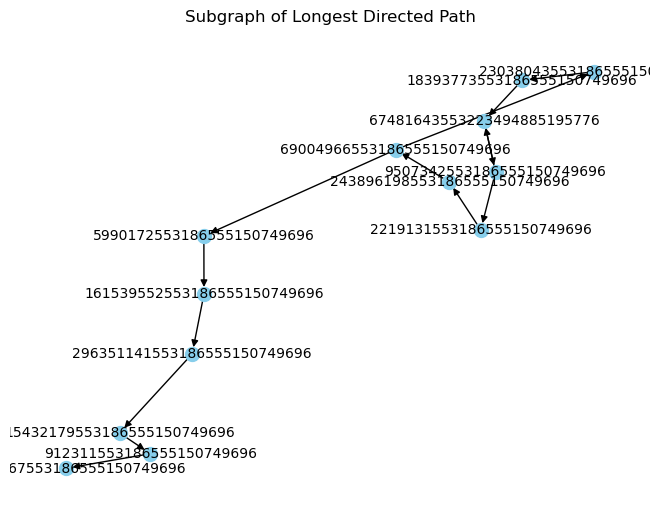

In [29]:
import pandas as pd
import networkx as nx


# Function to find the longest directed path using DFS
def longest_directed_path(graph, node):
    visited = set()
    stack = [node]
    longest_path = []

    while stack:
        current_node = stack.pop()
        visited.add(current_node)
        #path = nx.shortest_path(graph, source=node, target=current_node, method='dijkstra')
        path = nx.shortest_path(graph, source=node, target=current_node, method='dijkstra')
        if len(path) > len(longest_path):
            longest_path = path
        for neighbor in graph.successors(current_node):
            if neighbor not in visited:
                stack.append(neighbor)

    return longest_path

# Find the longest directed path in the graph
longest_path = []
for node in G.nodes:
    path = longest_directed_path(G, node)
    if len(path) > len(longest_path):
        longest_path = path

# Create a subgraph with only the vertices and edges in the longest path
subgraph = G.subgraph(longest_path)

# Display the longest path and its connected vertices
print("Longest directed path:", longest_path)
# connected_vertices = list(set(node for path in longest_path for node in path))
# print("Connected vertices:", connected_vertices)
print("Longest directed path:", len(longest_path))
LongPathForNonRumours_Twitter15=len(longest_path)
# Plot the subgraph with only the vertices and edges in the longest path
pos = nx.spring_layout(subgraph)  # Layout for visualization
nx.draw(subgraph, pos, with_labels=True, node_color='skyblue', node_size=100, font_size=10, font_color='black')
plt.title("Subgraph of Longest Directed Path")
plt.show()

In [30]:
md("### Maximum Propogation For Rumours That Is Fake Information is:  %i "%(len(longest_path)))

### Maximum Propogation For Rumours That Is Fake Information is:  13 

## Final Results:

In [31]:
print("Long Path For Rumours Thats Is True Information In Twitter16:" ,LongPathForRumours_Twitter16 )
print("Long Path For Rumours That Is Fake Information In Twitter16:",LongPathForNonRumours_Twitter16)
print("Long Path For Rumours That Is True Information In Twitter15:",LongPathForRumours_Twitter15)
print("Long Path For Rumours That Is Fake Information In Twitter15:",LongPathForNonRumours_Twitter15)

Long Path For Rumours Thats Is True Information In Twitter16: 12
Long Path For Rumours That Is Fake Information In Twitter16: 17
Long Path For Rumours That Is True Information In Twitter15: 11
Long Path For Rumours That Is Fake Information In Twitter15: 13
